# Anaconda
- Python + 모듈 + 주피터 노트북

# Jupyter Notebook
## Cell
## Command Mode
- 셀 자체에 명령(셀을 추가, 삭제, 이동, ...)
- a(bove) : 현재 셀 위에 셀 추가
- b(elow) : 현재 셀 아래에 셀 추가
- x       : 현재 셀 자르기, 삭제 대용으로 사용

## Edit mode
- 셀 안에 무언가 입력(파이썬 코드)
- shift + enter : 셀 단위로 실행 (최종 결과, 마지막 줄만 출력)
- markdown => 문서 작성 가능
    - 제목 붙이기

# 데이터 다루기
- 데이터 = 테이블
- 행(row) => 구체적인 데이터
- 열(column) => 데이터의 구성요소(속성)
- 그래서 DataFrame이 필요함!

## Pandas
- 핵심 : 새로운 자료구조를 제공
- Series, DataFrame

### Series
- 1차원 자료구조
- 구성요소 2개 : index, values
- 순서있음 => 슬라이싱, for문...

In [6]:
import pandas as pd

In [20]:
# A, B, C, D, E
math = [89, 92, 91, 90, 89]
math_sr = pd.Series( math, index=['A', 'B', 'C', 'D', 'E'] )

eng = [90, 91, 89, 92, 91]
eng_sr = pd.Series( eng, index=['A', 'B', 'C', 'D', 'E'] )

In [13]:
# 데이터 접근하기
# 기본적으로 인덱스
# 순서로도 가능
print( math_sr['A'] )
print( math_sr[0] )

89
89


C:\Users\USER\AppData\Local\Temp\ipykernel_30696\432983206.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print( math_sr[0] )


In [14]:
# 슬라이싱
math_sr[ : 2]

A    89
B    92
dtype: int64

In [16]:
# 기능들
math_sr.sort_values( ascending=False )

B    92
C    91
D    90
A    89
E    89
dtype: int64

In [17]:
# 필터링 : 조건에 맞는 데이터만 가지고 오기
math_sr[ math_sr > 90 ]  

B    92
C    91
dtype: int64

In [23]:
# 시리즈의 연산
# 인덱스를 기준으로 데이터끼리 연산
math_sr * eng_sr

A    8010
B    8372
C    8099
D    8280
E    8099
dtype: int64

In [ ]:
# 시리즈의 연산2
# 시리즈와 값하나를 연산
# 시리즈의 모든 데이터에게 똑같이 연산해 줌
math_sr * 100

In [24]:
(math_sr + eng_sr ) /2

A    89.5
B    91.5
C    90.0
D    91.0
E    90.0
dtype: float64

### DataFrame
- 2차원 자료구조
- 구성요소 3개 : column, index, values
- 순서있음 : 기본적으로 행방향

In [28]:
# A, B, C, D, E
math = [89, 92, 91, 90, 89]
eng = [90, 91, 89, 92, 91]
music = [90, 90, 89, 91, 88]

temp = {'math':math, 'eng':eng, 'music':music}
grade_df = pd.DataFrame(temp, index=['A', 'B', 'C', 'D', 'E'])

In [31]:
# 데이터 접근하기
# 기본적으로 컬럼
grade_df[ 'math' ]

A    89
B    92
C    91
D    90
E    89
Name: math, dtype: int64

In [33]:
# 컬럼 여러개 => 리스트로 묶어서
grade_df[ ['math', 'eng'] ]

,math,eng
A,89,90
B,92,91
C,91,89
D,90,92
E,89,91


In [36]:
# 인덱스를 기준으로 접근
# .loc

grade_df.loc[ ['A', 'B'] ]

,math,eng,music
A,89,90,90
B,92,91,90


In [42]:
# 데이터 값에 접근
# .loc[인덱스, 컬럼]

grade_df.loc[ 'A', 'math' ]

89

In [44]:
# iloc
# 테이블에서 숫자 좌표로 접근
# iloc[ 인덱스 순서, 컬럼의 순서 ]

grade_df.iloc[ 0, 0 ]

89

In [45]:
# 슬라이싱

grade_df[  : 2  ]

,math,eng,music
A,89,90,90
B,92,91,90


In [46]:
# iloc을 이용한 슬라이싱
# 행과 열 슬라이싱

grade_df.iloc[ :2 , : 2]

,math,eng
A,89,90
B,92,91


In [53]:
# 기능들
grade_df.sort_values( ['math', 'eng'], ascending=False  )

,math,eng,music
B,92,91,90
C,91,89,89
D,90,92,91
E,89,91,88
A,89,90,90


In [56]:
# 필터링
# 1. 어떤 컬럼을 기준으로 조건을 주는것인지 명확
grade_df[ grade_df['music'] > 90 ]

,math,eng,music
D,90,92,91


In [60]:
# 2. 조건이 2개일 때
# 연산 순서를 명확히
# 논리연산(&, |, ~ )
grade_df[ (grade_df['math'] > 90) & (grade_df['eng'] > 90) ]

,math,eng,music
B,92,91,90


In [61]:
# 3. 조건이 3개 이상일 때
# 미리 계산해서 변수에 할당

cond1 = grade_df['math'] >= 90
cond2 = grade_df['eng'] >= 90
cond3 = grade_df['music'] >= 90
grade_df[ cond1 & cond2 & cond3 ]

,math,eng,music
B,92,91,90
D,90,92,91


In [67]:
# 시리즈의 연산
# 테이블에서 속성(시리즈)과 속성(시리즈)을 연산 => 새로운 속성(시리즈)

grade_df['total'] = grade_df['math'] + grade_df['eng'] + grade_df['music']

In [72]:
grade_df['avg'] = (grade_df['total'] / 3).round(2)

In [73]:
grade_df

,math,eng,music,total,avg
A,89,90,90,269,89.67
B,92,91,90,273,91.00
C,91,89,89,269,89.67
D,90,92,91,273,91.00
E,89,91,88,268,89.33


### DataFrame 연습
- 주요 기능들
- 시리즈의 연산, 필터링, apply, groupby, pivot

In [74]:
import pandas as pd                 # DataFrame
import numpy as np                  # 선형대수 연산
import matplotlib.pyplot as plt     # 데이터 시각화
import seaborn as sns

In [76]:
titanic_df = sns.load_dataset( 'titanic' )

In [ ]:
# 필터링 연습
# 1. 죽었음
# 2. 남자
# 3. 3 class
# 4. 20살 이상
# 5. 25살 미만

cond1 = titanic_df['survived'] == 0
cond2 = titanic_df['sex'] == 'male'
cond3 = titanic_df['pclass'] == 3
cond4 = titanic_df['age'] >= 20
cond5 = titanic_df['age'] < 25
titanic_df[cond1 & cond2 & cond3 & cond4 & cond5]

In [81]:
# 시리즈의 연산
titanic_df['family'] = titanic_df['sibsp'] + titanic_df['parch']

In [98]:
# apply
# 한 열의 모든 데이터에게 똑같은 코드를 적용해주기 위해

# age 0 ~ 80
# 0 ~ 20 이하 => young
# 20 ~ 40 이하 => middle
# 40 ~ => old

def temp(x):
    if x <= 20:
        return 'young'
    elif x <= 40:
        return 'middle'
    else:
        return 'old'

titanic_df['age_c'] = titanic_df['age'].apply( temp )

In [102]:
# fare
# fare <= 10 : low
# fare <= 100 :middle
# fare ~  : high
def temp(x):
    if x <= 10:
        return 'low'
    elif x <= 100:
        return 'middle'
    else:
        return 'high'

titanic_df['fare_c'] = titanic_df['fare'].apply( temp )

In [114]:
# groupby 
# 집계 : 합, 평균, 최대, 최소, 갯수
# 카테고리 별 집계 => 1차원

titanic_df.groupby( ['pclass', 'sex'] )[ 'age' ].mean()

pclass  sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: age, dtype: float64

In [115]:
# pivot
# 카테고리 별 집계 => 2차원

pd.pivot_table(  titanic_df, columns='sex', index='pclass', values='age',
                 aggfunc='mean' )

sex,female,male
pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


# 데이터 시각화
- 이쁘게 그려서 남에게 보여주기 X
- 우리가 데이터를 이해할 수 있는 거의 유일한 수단(현미경)
- 데이터 종류에 따라 적절한 시각화 있음
- 데이터 종류 : 카테고리, 연속된 숫자

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

tip_df = sns.load_dataset('tips')

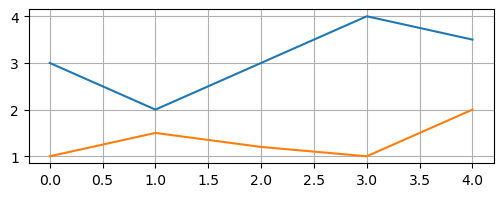

In [127]:
# 시각화 기본폼
아래 코드를 기반으로 데이터 시각화를 더 이쁘게 꾸며줘
plt.figure( figsize=( 6, 2 ) )  # 시작점

plt.plot( [3 ,2, 3, 4, 3.5] )
plt.plot( [1 ,1.5, 1.2, 1, 2] )

plt.show()    # 마침표

## 카테고리 데이터
- 카테고리 별 데이터의 개수(분포)
- sns.countplot

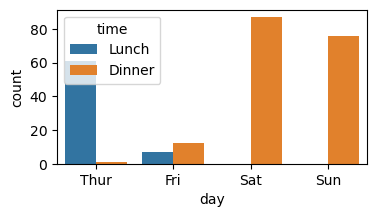

In [138]:
plt.figure(figsize=(4, 2))

sns.countplot( data=tip_df, x='day', hue='time' )

plt.show()

## 연속된 숫자 데이터
- 히스토그램을 이용하여 숫자 데이터의 분포
- 어디에 데이터가 몰려있고, 어떻게 퍼져있는지 살펴봄
- sns.histplot

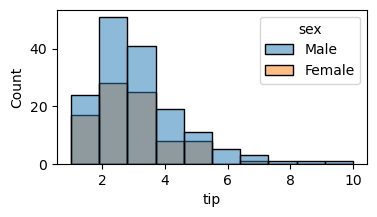

In [145]:
plt.figure(figsize=(4, 2))

sns.histplot( data=tip_df, x='tip', bins=10, hue='sex' )

plt.show()

## 카테고리 - 연속된 숫자 데이터 관계
- 카테고리 별 연속된 숫자 데이터의 분포를 살펴봄
- boxplot, violinplot

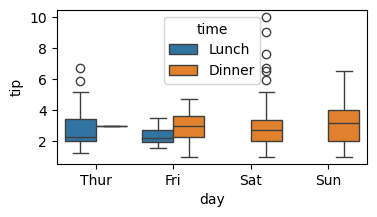

In [147]:
plt.figure(figsize=(4, 2))

sns.boxplot( data=tip_df, x='day', y='tip', hue='time' )

plt.show()

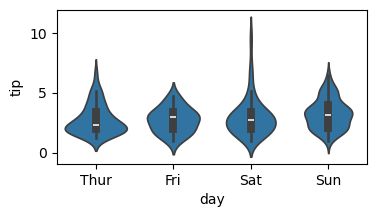

In [149]:
plt.figure(figsize=(4, 2))

sns.violinplot( data=tip_df, x='day', y='tip')

plt.show()

## 연속된 숫자 - 연속된 숫자 데이터 관계
- 2차원 평면 위에 두 데이터가 만나는 지점마다 점을 찍음
- 산포도(scatter)
- sns.scatterplot

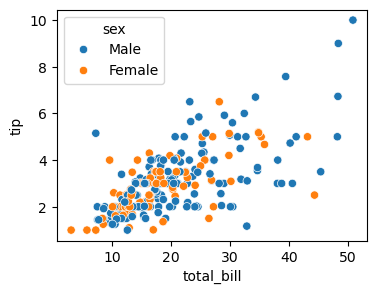

In [153]:
plt.figure(figsize=(4, 3))

sns.scatterplot( data=tip_df, x='total_bill', y='tip', hue='sex' )

plt.show()

# 머신러닝 큰틀

In [155]:
iris_df = sns.load_dataset('iris')

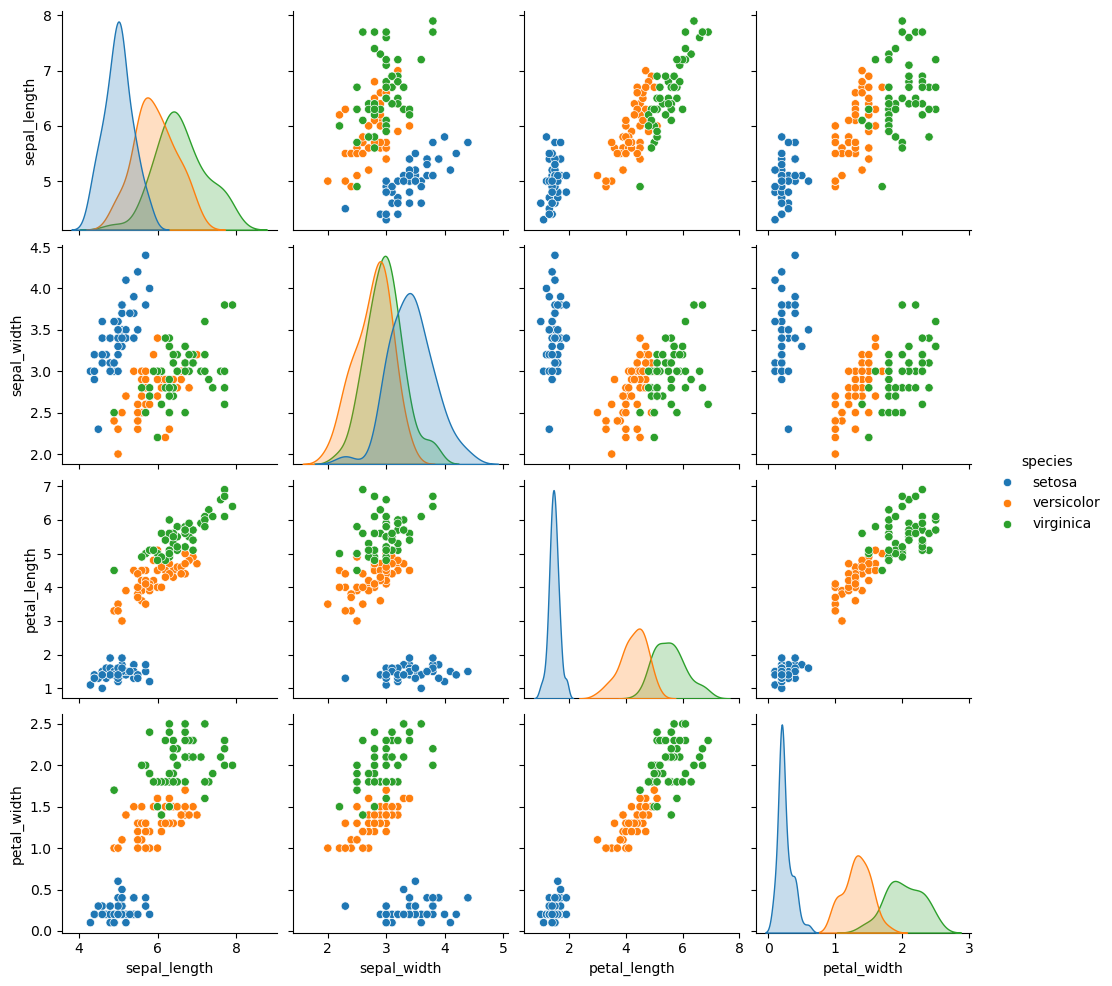

In [158]:
sns.pairplot( iris_df, hue='species' )
plt.show()

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
# 사이킷런 ML 모델 사용법 => 3단계
# 1. 모델을 생성
knn = KNeighborsClassifier()
# 2. 모델을 데이터에 훈련(fit)
# => target(1차원)과 feature(2차원)로 나누어서 넣어야 함
y = iris_df['species']
X = iris_df.iloc[ :, :-1 ]
knn.fit( X, y )
# 3. 훈련된 모델을 예측(predict), 검증(score)
knn.score(X, y)

0.9666666666666667

In [191]:
# 훈련용 데이터 // 검증용 데이터 나누기
# 보통은 7:3, 데이터가 적을 땐 8:2
# 섞어서 가져오자!
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                       test_size=0.2,
                                                       random_state=13,
                                                       stratify=y)

In [187]:
# 1. 모델 생성
knn = KNeighborsClassifier()
# 2. 모델 훈련
knn.fit(train_x, train_y)
# 3. 검증
knn.score(valid_x, valid_y)

0.9666666666666667

In [193]:
# 몇 개의 K를 세팅해야 하지?! => 하이퍼 파라미터
# 어떻게 하이퍼 파라미터를 찾을까?! => 데이터에 따라 다르기 때문에 알아서 잘...
# 훈련용 데이터를 가지고 교차검증을 이용해서 하이퍼 파라미터를 찾음

In [194]:
from sklearn.model_selection import cross_val_score

In [197]:
score_list = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score( knn, train_x, train_y, cv=4 ).mean()
    score_list.append(score)

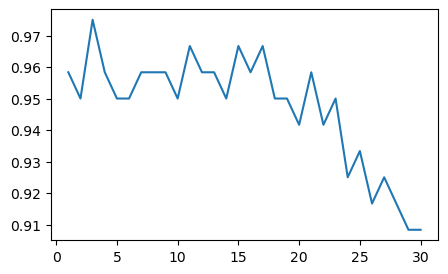

In [199]:
plt.figure(figsize=(5, 3))

plt.plot( range(1, 31), score_list )

plt.show()

In [200]:
# 하이퍼 파라미터를 5라고 찾음
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
knn.score(valid_x, valid_y)

0.9666666666666667

In [204]:
iris_df['sepal_length'] = iris_df['sepal_length'] * 100
y = iris_df['species']
X = iris_df.iloc[ :, :-1 ]

train_x, valid_x, train_y, valid_y = train_test_split(X, y,
                                                       test_size=0.2,
                                                       random_state=13,
                                                       stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
knn.score(valid_x, valid_y)

0.8